<a href="https://colab.research.google.com/github/KirilPal/Laboratory_work_numerical_methods-/blob/main/%D0%9B%D0%A0_9_%D0%9F%D0%B0%D0%BB%D0%B0%D0%BC%D0%B0%D1%80%D1%87%D1%83%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Паламарчук Кіріл
Лабораторна робота №9
Варіант 22
Група 2-8

**Побудова кубічного сплайну**

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


In [4]:

# Дані
x = np.array([0.6, 0.8, 1.1, 1.6, 2])
y = np.array([1.76, 2.61, 3.89, 2.18, 4.35])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)  # Розширюємо на один елемент для останнього індексу c[n]

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n + 1)  # Розширюємо l на один елемент
mu = np.zeros(n)
z = np.zeros(n + 1)  # Розширюємо на один елемент

# Пряма хода для знаходження l, mu, z
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Крайова умова: c[n] = 0
l[n] = 1
z[n] = 0
c[n] = 0

# Зворотний хід для знаходження c, b, d
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайну для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 1.76 + 3.8026(x - 0.6) + 0.0(x - 0.6)^2 + 11.1859(x - 0.6)^3, x належить [0.6, 0.8]
Відрізок 2:
S_1(x) = 2.61 + 5.1449(x - 0.8) + 6.7116(x - 0.8)^2 + -32.1298(x - 0.8)^3, x належить [0.8, 1.1]
Відрізок 3:
S_2(x) = 3.89 + 0.4968(x - 1.1) + -22.2052(x - 1.1)^2 + 28.7433(x - 1.1)^3, x належить [1.1, 1.6]
Відрізок 4:
S_3(x) = 2.18 + -0.1509(x - 1.6) + 20.9098(x - 1.6)^2 + -17.4248(x - 1.6)^3, x належить [1.6, 2.0]


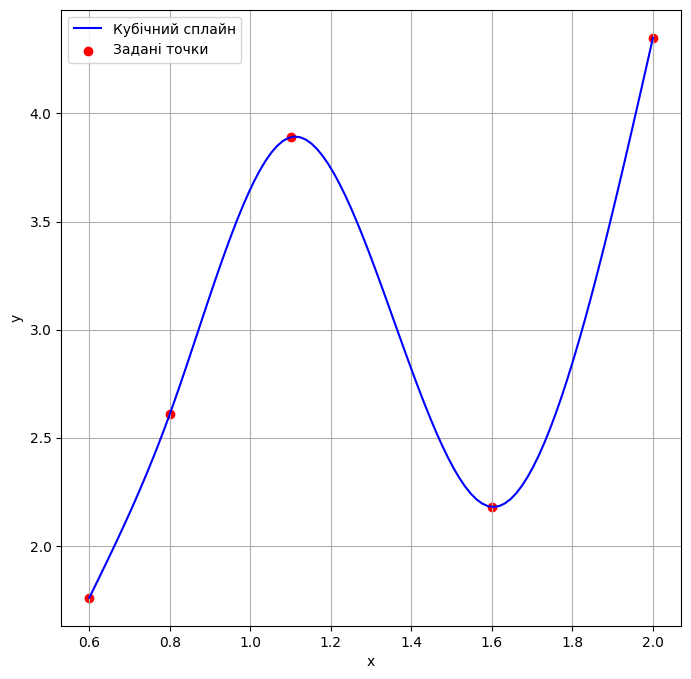

In [5]:
# Побудова графіка
x_values = np.linspace(np.min(x), np.max(x), 100)  # Діапазон для побудови графіка
y_values = [ ]# Значення сплайна

# Обчислення значень сплайна для кожного відрізка
for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values.extend(y_interval)

# Побудова графіка
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='b')
plt.scatter(x, y, label="Задані точки", color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

**Перевірка методу CublicSpline**

In [6]:
from scipy.interpolate import CubicSpline

# Вхідні дані
x = np.array([0.6, 0.8, 1.1, 1.6, 2])
y = np.array([1.76, 2.61, 3.89, 2.18, 4.35])

# Побудова кубічного сплайну
cs = CubicSpline(x, y)

# Виведення коефіцієнтів сплайну для кожного відрізка
for i in range(len(x)-1):
    coeffs = cs.c[:, i]  # Коефіцієнти для i-го інтервалу
    spline = f'S_{i+1}(x) = {coeffs[0]:.4f}*(x - {x[i]})^3 + {coeffs[1]:.4f}*(x - {x[i]})^2 + {coeffs[2]:.4f}*(x - {x[i]}) + {coeffs[3]:.4f}'
    print(spline)

S_1(x) = -23.2408*(x - 0.6)^3 + 16.3019*(x - 0.6)^2 + 1.9192*(x - 0.6) + 1.7600
S_2(x) = -23.2408*(x - 0.8)^3 + 2.3574*(x - 0.8)^2 + 5.6511*(x - 0.8) + 2.6100
S_3(x) = 20.2765*(x - 1.1)^3 + -18.5593*(x - 1.1)^2 + 0.7905*(x - 1.1) + 3.8900
S_4(x) = 20.2765*(x - 1.6)^3 + 11.8554*(x - 1.6)^2 + -2.5614*(x - 1.6) + 2.1800


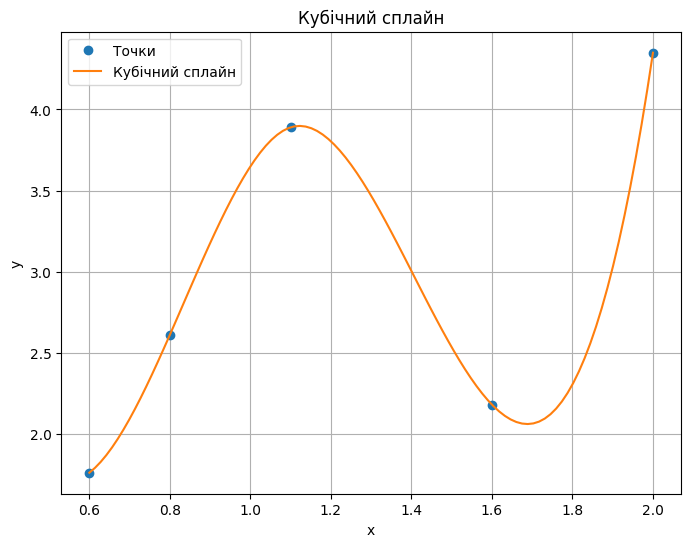

In [7]:
# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()